# Week 4 Assignment 2

## Zach Dravis, Gabby Bartomeo, Hovig Ohannessian, Peter Lombardo

In [1]:
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from base64 import b16encode
import requests
from io import BytesIO
import urllib.request
import warnings
import requests
import signal
import sys
import json as r
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
url = 'https://raw.githubusercontent.com/PLombardo811/620/Week4_2/term_frame.csv'
df = pd.read_csv(url)
df.freq.astype(int)
df = df.reset_index()

### How many total unique words are in the corpus? 

In [3]:
row_count = len(df)
row_count

1162

### Taking the most common words, how many unique words represent half of the total words in the corpus?

In [4]:
Total = df.freq.sum()
Total
Top_Half = Total / 2
Top_Half

947.5

In [5]:
running_total = np.cumsum(df.freq)
running_total = list(running_total) 
df['running_total'] = running_total

In [6]:
df_top_half = df.loc[df['running_total'] < Top_Half]
df_top_half

,index,word,freq,running_total
0,0,yankees,54,54
1,1,win,23,77
2,2,great,19,96
3,3,game,15,111
4,4,just,13,124
5,5,bird,12,136
6,6,love,12,148
7,7,get,11,159
8,8,good,11,170
9,9,yanks,11,181


In [7]:
row_count = len(df_top_half)
row_count

241

### Identify the 200 highest frequency words in this corpus.

In [8]:
df_high_freq = df.loc[df['index'] < 201]
df_high_freq

,index,word,freq,running_total
0,0,yankees,54,54
1,1,win,23,77
2,2,great,19,96
3,3,game,15,111
4,4,just,13,124
5,5,bird,12,136
6,6,love,12,148
7,7,get,11,159
8,8,good,11,170
9,9,yanks,11,181


### Create a graph that shows the relative frequency of these 200 word

In [9]:
word_count = list(set(df["word"].tolist()))
node_categories = {
    "word": df_high_freq["word"].tolist(),
    "freq": df_high_freq["freq"].tolist() 
}

In [10]:
G = nx.Graph()
G.add_edges_from(df_high_freq.apply(lambda x: (x["freq"], x["word"]), axis=1))
G.add_nodes_from(df_high_freq["word"].tolist())
for node in G:
    if node in word_count:
        G.node[node]["category"] = "word"
    else:
        G.node[node]["category"] = "freq"

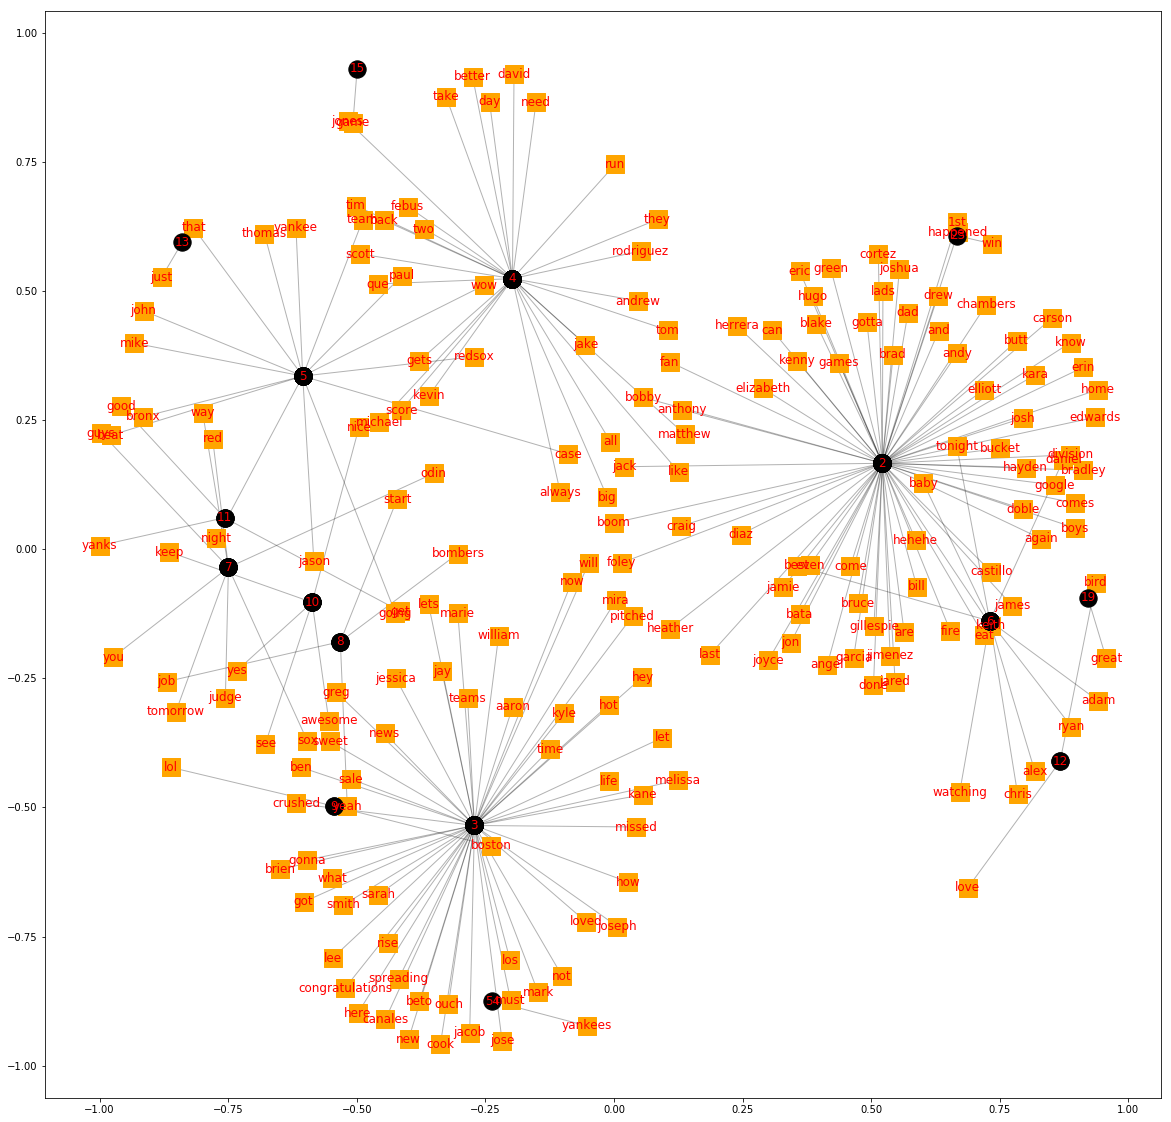

In [11]:
pos = nx.spring_layout(G,k=0.5,iterations=100)
plt.figure(figsize=(20,20))
nx.draw_networkx_labels(G, pos, font_color='red')
nx.draw_networkx_edges(G, pos, alpha=.3)
nx.draw_networkx_nodes(G, pos, nodelist=node_categories["word"], node_color="orange", node_shape="s")
nx.draw_networkx_nodes(G, pos, nodelist=node_categories["freq"], node_color="black", node_shape="o")
plt.show()

### Does the observed relative frequency of these words follow Zipf’s law? Explain.
####From the plot below it appears the corpus follows Zipf law. Each word is nearly half as frequent as word before it. 

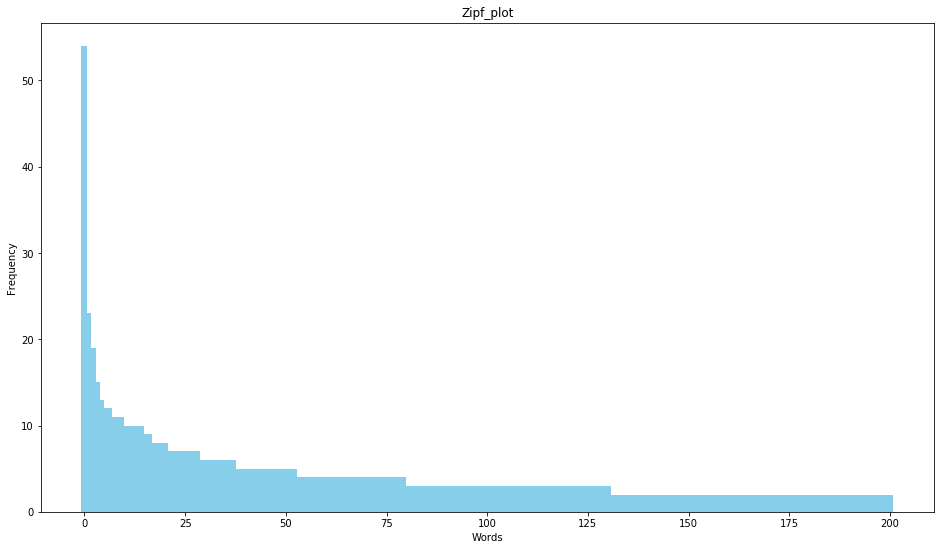

In [13]:
Zipf_plot = df_high_freq
plt.bar(Zipf_plot.index, Zipf_plot.freq, color="skyblue", width=1.5)
plt.ylabel('Frequency')
plt.xlabel('Words')
plt.title('Zipf_plot') 
plt.rcParams["figure.figsize"] = [160,90]
plt.show()

### In what ways do you think the frequency of the words in this corpus differ from “all words in all corpora.”
####In my R script I removed common words such as "the" and "is." This allowrd me to focus on words relevent to my topic.
####If a full corpus was used common words would show the highests frequency. 